In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,precision_recall_fscore_support,precision_score,recall_score,f1_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,precision_recall_curve,average_precision_score,auc
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV


In [10]:
import pandas as pd
drug_df=pd.read_csv("drug_responses.csv",sep=",")
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [84]:
drug_df['BP'].value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [85]:
def get_accuracy(X_train,Y_train,X_test,Y_test,model):
    return {'train_accuracy':accuracy_score(Y_train,model.predict(X_train)),'test_accuracy':accuracy_score(Y_test,model.predict(X_test))}

In [86]:
drug_df.shape

(200, 6)

In [87]:
drug_df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [88]:
drug_df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [89]:
drug_df['Cholesterol'].value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [90]:
drug_df.shape

(200, 6)

In [91]:
le_sex=LabelEncoder()
le_sex.fit(['F','M'])
drug_df.iloc[:,1]=le_sex.transform(drug_df.iloc[:,1])
le_bp=LabelEncoder()
le_bp.fit(['LOW','NORMAL','HIGH'])
drug_df.iloc[:,2]=le_bp.transform(drug_df.iloc[:,2])
le_chol=LabelEncoder()
le_chol.fit(['NORMAL','HIGH'])
drug_df.iloc[:,3]=le_chol.transform(drug_df.iloc[:,3])

In [92]:
le_bp.classes_

array(['HIGH', 'LOW', 'NORMAL'], dtype='<U6')

In [93]:
drug_df['BP'].value_counts()

BP
0    77
1    64
2    59
Name: count, dtype: int64

In [94]:
le_chol.classes_

array(['HIGH', 'NORMAL'], dtype='<U6')

In [95]:
drug_df['Cholesterol'].value_counts()

Cholesterol
0    103
1     97
Name: count, dtype: int64

In [96]:
le_sex.classes_

array(['F', 'M'], dtype='<U1')

In [97]:
drug_df['Sex'].value_counts()

Sex
1    104
0     96
Name: count, dtype: int64

In [98]:
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [99]:
le_y=LabelEncoder()
drug_df['Drug']=le_y.fit_transform(drug_df['Drug'])

In [100]:
le_y.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

In [101]:
drug_df['Drug'].value_counts()

Drug
4    91
3    54
0    23
2    16
1    16
Name: count, dtype: int64

In [102]:
drug_df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug             int64
dtype: object

In [103]:
correlation_matrix=drug_df.corr()
correlation_matrix

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


In [104]:
correlation_matrix.values[range(len(correlation_matrix)),range(len(correlation_matrix))]=0
correlation_matrix

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,0.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,0.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,0.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,0.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,0.000000,0.589120
Drug,-0.004828,-0.098573,0.372868,0.055629,0.589120,0.000000


In [105]:
features_max_corr=[]
for col in correlation_matrix.columns:
    corr_features_of_col=correlation_matrix[col].drop(col)
    max_idx=corr_features_of_col.idxmax()
    value=corr_features_of_col[max_idx]
    features_max_corr.append((col,max_idx,value))
features_max_corr

[('Age', 'Sex', np.float64(0.10202736073161901)),
 ('Sex', 'Age', np.float64(0.10202736073161901)),
 ('BP', 'Drug', np.float64(0.37286795607797363)),
 ('Cholesterol', 'Drug', np.float64(0.05562880047671424)),
 ('Na_to_K', 'Drug', np.float64(0.5891198660590573)),
 ('Drug', 'Na_to_K', np.float64(0.5891198660590573))]

In [106]:
sorted_max_corr_features=sorted(features_max_corr,key=lambda x:x[2])
sorted_max_corr_features[-1:]

[('Drug', 'Na_to_K', np.float64(0.5891198660590573))]

<Axes: >

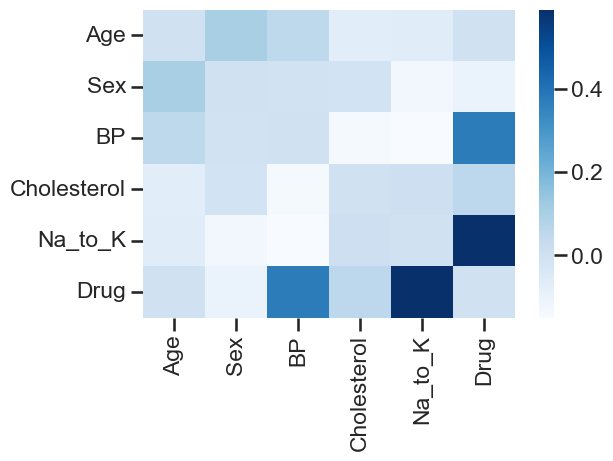

In [107]:
fig,ax=plt.subplots(figsize=(6,4))
sns.heatmap(correlation_matrix,cmap='Blues')

In [108]:
correlation_matrix['Drug'].sort_values() # we can see that na_to_k,bp are highly correlated with 'Drug' than others

Sex           -0.098573
Age           -0.004828
Drug           0.000000
Cholesterol    0.055629
BP             0.372868
Na_to_K        0.589120
Name: Drug, dtype: float64

In [109]:
'''
Mildly Skewed: Skewness between -0.5 and 0.5.
Moderately Skewed: Skewness between -1 and -0.5 or 0.5 and 1.
Highly Skewed: Skewness less than -1 or greater than 1.
'''
skew_vals=drug_df.skew()
threshold=0.5 
skew_vals=skew_vals[abs(skew_vals)>threshold]
skew_vals

Na_to_K    1.039341
Drug      -1.036558
dtype: object

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Na_to_K'}>],
       [<Axes: title={'center': 'Drug'}>, <Axes: >]], dtype=object)

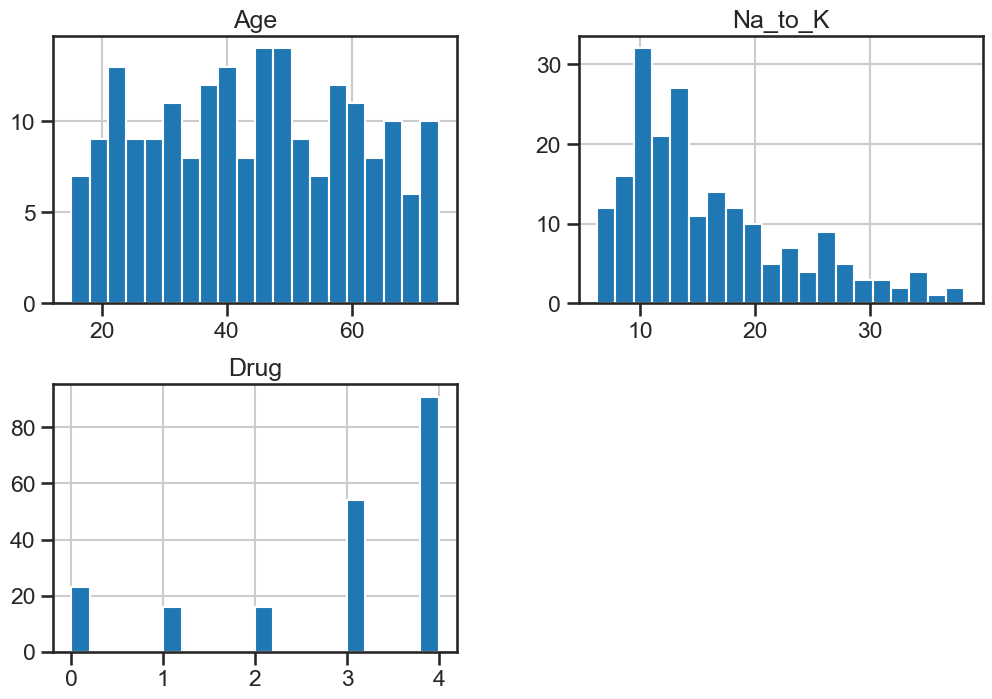

In [110]:
drug_df.hist(bins=20,figsize=(12,8))

In [111]:
drug_df.describe()

,Age,Na_to_K,Drug
count,200.000000,200.000000,200.000000
mean,44.315000,16.084485,2.870000
std,16.544315,7.223956,1.372047
min,15.000000,6.269000,0.000000
25%,31.000000,10.445500,2.000000
50%,45.000000,13.936500,3.000000
75%,58.000000,19.380000,4.000000
max,74.000000,38.247000,4.000000


In [112]:
numerical_columns=['Age','Na_to_K']
scaler=StandardScaler()
drug_df[numerical_columns]=scaler.fit_transform(drug_df[numerical_columns])

In [113]:
correlation_matrix=drug_df.corr()
correlation_matrix

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


In [114]:
correlation_matrix.values[range(len(correlation_matrix)),range(len(correlation_matrix))]=0
correlation_matrix

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,0.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,0.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,0.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,0.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,0.000000,0.589120
Drug,-0.004828,-0.098573,0.372868,0.055629,0.589120,0.000000


In [115]:
features_max_corr=[]
for col in correlation_matrix.columns:
    corr_features_of_col=correlation_matrix[col].drop(col)
    max_idx=corr_features_of_col.idxmax()
    value=corr_features_of_col[max_idx]
    features_max_corr.append((col,max_idx,value))
features_max_corr

[('Age', 'Sex', np.float64(0.10202736073161904)),
 ('Sex', 'Age', np.float64(0.10202736073161904)),
 ('BP', 'Drug', np.float64(0.37286795607797363)),
 ('Cholesterol', 'Drug', np.float64(0.05562880047671424)),
 ('Na_to_K', 'Drug', np.float64(0.5891198660590569)),
 ('Drug', 'Na_to_K', np.float64(0.5891198660590569))]

In [116]:
sorted_max_corr_features=sorted(features_max_corr,key=lambda x:x[2])
sorted_max_corr_features[-1:]

[('Drug', 'Na_to_K', np.float64(0.5891198660590569))]

<Axes: >

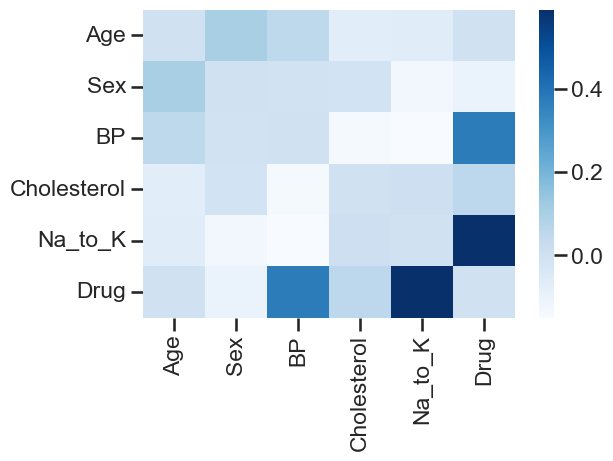

In [117]:
fig,ax=plt.subplots(figsize=(6,4))
sns.heatmap(correlation_matrix,cmap='Blues')

In [118]:
correlation_matrix['Drug'].sort_values() 

Sex           -0.098573
Age           -0.004828
Drug           0.000000
Cholesterol    0.055629
BP             0.372868
Na_to_K        0.589120
Name: Drug, dtype: float64

In [119]:
drug_df['Drug'].value_counts(normalize=True) # as data is dtributed equally , to ensure this ratio is maintained in training data and test as well we will be using stratify

Drug
4    0.455
3    0.270
0    0.115
2    0.080
1    0.080
Name: proportion, dtype: float64

In [120]:
columns=drug_df.columns.to_list()
X=drug_df[columns[:-1]]
Y=drug_df['Drug']

In [121]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,-1.291591,0,0,0,1.286522
1,0.162699,1,1,0,-0.415145
2,0.162699,1,1,0,-0.828558
3,-0.988614,0,2,0,-1.149963
4,1.011034,0,1,0,0.271794


In [122]:
Y.head()

0    4
1    2
2    2
3    3
4    4
Name: Drug, dtype: int64

In [123]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=42)
print('train data size:',X_train.shape,Y_train.shape)
print('test data size:',X_test.shape,Y_test.shape)

train data size: (140, 5) (140,)
test data size: (60, 5) (60,)


In [178]:
Y_test.value_counts()

Drug
4    27
3    16
0     7
1     5
2     5
Name: count, dtype: int64

In [124]:
lr=LogisticRegression(random_state=42)
lr.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [125]:
def eval_metrics(Y_test,Y_predict):
    print('accuracy score:',accuracy_score(Y_test,Y_predict))
    precision,recall,fscore,_=precision_recall_fscore_support(Y_test,Y_predict)
    print('precision:',precision)
    print('recall:',recall)
    print('f1score:',fscore)

In [126]:
y_predict_lr=lr.predict(X_test)
eval_metrics(Y_test,y_predict_lr)

accuracy score: 0.9166666666666666
precision: [0.63636364 1.         1.         1.         0.96153846]
recall: [1.         0.8        0.6        1.         0.92592593]
f1score: [0.77777778 0.88888889 0.75       1.         0.94339623]


In [127]:
le_y.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

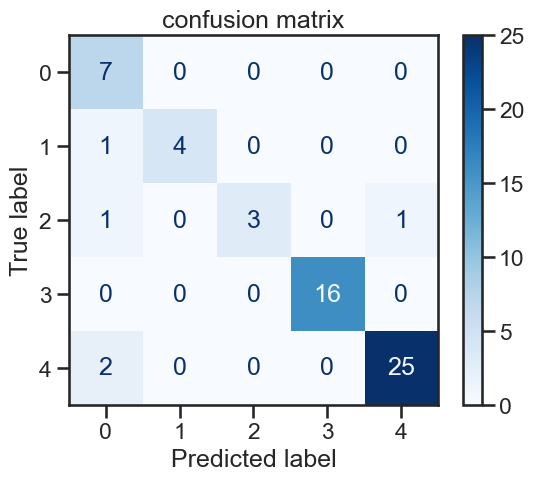

In [128]:
cm=confusion_matrix(Y_test,y_predict_lr)
disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues',values_format='d')
plt.title('confusion matrix')
plt.show() 

In [129]:
def plot_confusion_matrix(Y_test,Y_predict):
    cm=confusion_matrix(Y_test,Y_predict)
    disp=ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues',values_format='d')
    plt.title('confusion matrix')
    plt.show()

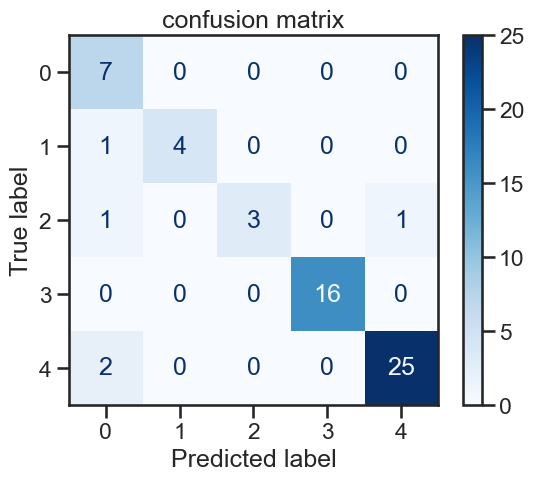

In [130]:
plot_confusion_matrix(Y_test,y_predict_lr)

In [131]:
def plot_roc_curve(y_test,y_proba):
    fpr,tpr,thresholds=roc_curve(y_test,y_proba)
    roc_auc=auc(fpr,tpr)
    plt.figure(figsize=(12,8))
    plt.plot(fpr,tpr,color='blue',lw=3,label=f'roc curve (AUC={roc_auc:0.2f})')
    plt.xlabel('False positive rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.grid(True)
    plt.legend(loc='lower right')

In [132]:
from sklearn.linear_model import LogisticRegressionCV
lr_l1=LogisticRegressionCV(Cs=5,cv=3,penalty='l1',solver='liblinear',max_iter=1000)
lr_l1.fit(X_train,Y_train)


LogisticRegressionCV(Cs=5, cv=3, max_iter=1000, penalty='l1',
                     solver='liblinear')

In [133]:
y_pred_l1=lr_l1.predict(X_test)
eval_metrics(Y_test,y_pred_l1)

accuracy score: 0.9
precision: [1.         1.         0.45454545 1.         1.        ]
recall: [0.85714286 0.6        1.         0.875      0.96296296]
f1score: [0.92307692 0.75       0.625      0.93333333 0.98113208]


In [134]:
lr_l2=LogisticRegressionCV(Cs=5,cv=3,penalty='l2',solver='liblinear')
lr_l2.fit(X_train,Y_train)

LogisticRegressionCV(Cs=5, cv=3, solver='liblinear')

In [135]:
y_pred_l2=lr_l2.predict(X_test)
eval_metrics(Y_test,y_pred_l2)

accuracy score: 0.9166666666666666
precision: [1.  1.  0.5 1.  1. ]
recall: [0.85714286 0.6        1.         0.875      1.        ]
f1score: [0.92307692 0.75       0.66666667 0.93333333 1.        ]


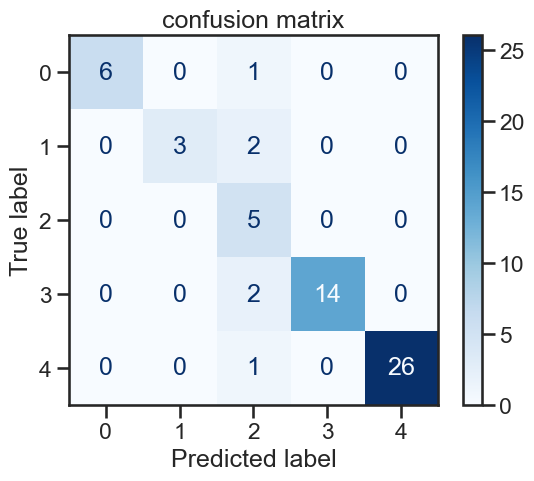

In [136]:
plot_confusion_matrix(Y_test,y_pred_l1) 

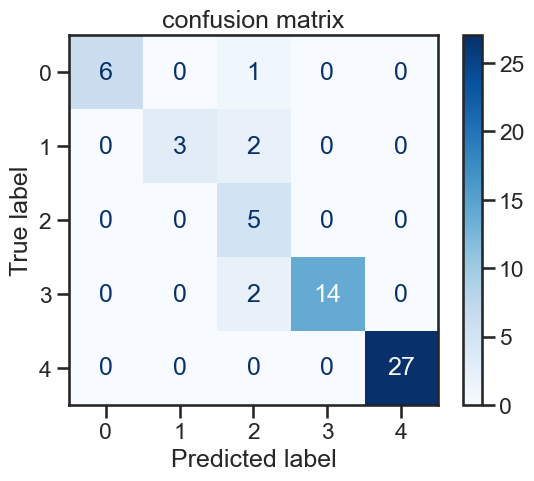

In [137]:
plot_confusion_matrix(Y_test,y_pred_l2)

In [138]:
print('Logistic Regression :')
print(classification_report(Y_test,y_predict_lr))
print('Logistic Regression (penalty l1):')
print(classification_report(Y_test,y_pred_l1))
print('Logistic Regression (penalty l2):')
print(classification_report(Y_test,y_pred_l2))

Logistic Regression :
              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.80      0.89         5
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00        16
           4       0.96      0.93      0.94        27

    accuracy                           0.92        60
   macro avg       0.92      0.87      0.87        60
weighted avg       0.94      0.92      0.92        60

Logistic Regression (penalty l1):
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      0.60      0.75         5
           2       0.45      1.00      0.62         5
           3       1.00      0.88      0.93        16
           4       1.00      0.96      0.98        27

    accuracy                           0.90        60
   macro avg       0.89      0.86      0.84        60
weighted avg       0.

In [139]:
print('Logistic Regression :')
get_accuracy(X_train,Y_train,X_test,Y_test,lr)

Logistic Regression :


{'train_accuracy': 0.9642857142857143, 'test_accuracy': 0.9166666666666666}

In [140]:
print('Logistic Regression (penalty l1) :')
get_accuracy(X_train,Y_train,X_test,Y_test,lr_l1)

Logistic Regression (penalty l1) :


{'train_accuracy': 0.9285714285714286, 'test_accuracy': 0.9}

In [141]:
print('Logistic Regression (penalty l2) :')
get_accuracy(X_train,Y_train,X_test,Y_test,lr_l2)

Logistic Regression (penalty l2) :


{'train_accuracy': 0.9642857142857143, 'test_accuracy': 0.9166666666666666}

In [142]:
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X_train,Y_train)
y_pred_knn=knn.predict(X_test)
print(classification_report(Y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       0.67      0.80      0.73         5
           2       0.67      0.80      0.73         5
           3       0.88      0.94      0.91        16
           4       0.95      0.78      0.86        27

    accuracy                           0.83        60
   macro avg       0.77      0.83      0.79        60
weighted avg       0.85      0.83      0.84        60



In [143]:
knn=KNeighborsClassifier()
param_grid={'n_neighbors':[i+1 for i in range(51)],'weights':['distance']}
gr_knn=GridSearchCV(knn,param_grid=param_grid,scoring='accuracy')

In [144]:
gr_knn.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['distance']},
             scoring='accuracy')

In [145]:
gr_knn.best_score_

np.float64(0.9214285714285715)

In [146]:
gr_knn.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51],
  'weights': ['distance']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

In [147]:
gr_knn.best_params_ # it do better with training data but the accuracy score of test data is low

{'n_neighbors': 7, 'weights': 'distance'}

In [148]:
y_pred_gr_knn=gr_knn.predict(X_test)
print(classification_report(Y_test,y_pred_gr_knn))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.80      0.80      0.80         5
           2       0.67      0.80      0.73         5
           3       0.89      1.00      0.94        16
           4       1.00      0.81      0.90        27

    accuracy                           0.88        60
   macro avg       0.83      0.88      0.85        60
weighted avg       0.90      0.88      0.88        60



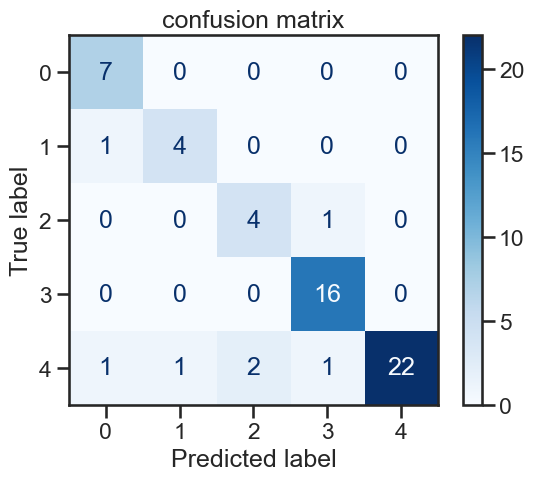

In [176]:
plot_confusion_matrix(Y_test,y_pred_gr_knn)

In [149]:
print('K Nearest Neighbors :')
get_accuracy(X_train,Y_train,X_test,Y_test,gr_knn)

K Nearest Neighbors :


{'train_accuracy': 1.0, 'test_accuracy': 0.8833333333333333}

In [150]:
max_k=50
f1_scores=[]
error_rates=[]
for k in range(1,max_k+1):
    knn=KNeighborsClassifier(n_neighbors=k,weights='distance')
    knn=knn.fit(X_train,Y_train)
    y_pred=knn.predict(X_test)
    f1_scores.append((k,round(f1_score(Y_test,y_pred,average='macro'),4)))
    error=1-accuracy_score(Y_test,y_pred)
    error_rates.append((k,round(error,4)))
f1_scores=pd.DataFrame(f1_scores,columns=['K','F1score'])
error_rates=pd.DataFrame(error_rates,columns=['K','Error Rate'])

<Figure size 1920x1440 with 0 Axes>

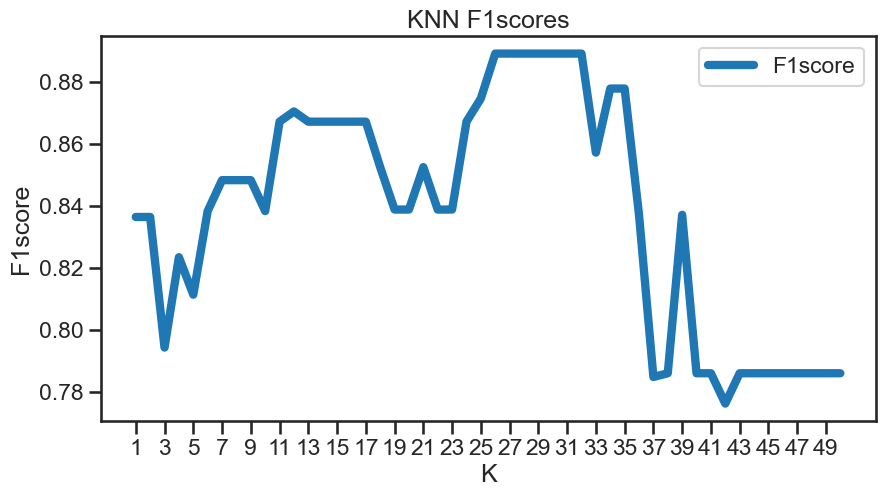

In [151]:
sns.set_context('talk')
sns.set_style('ticks')
plt.figure(dpi=300)
ax=f1_scores.set_index('K').plot(figsize=(10,5),linewidth=6)
ax.set(xlabel='K',ylabel='F1score')
ax.set_title('KNN F1scores')
ax.set_xticks(range(1,max_k+1,2))


<Figure size 1920x1440 with 0 Axes>

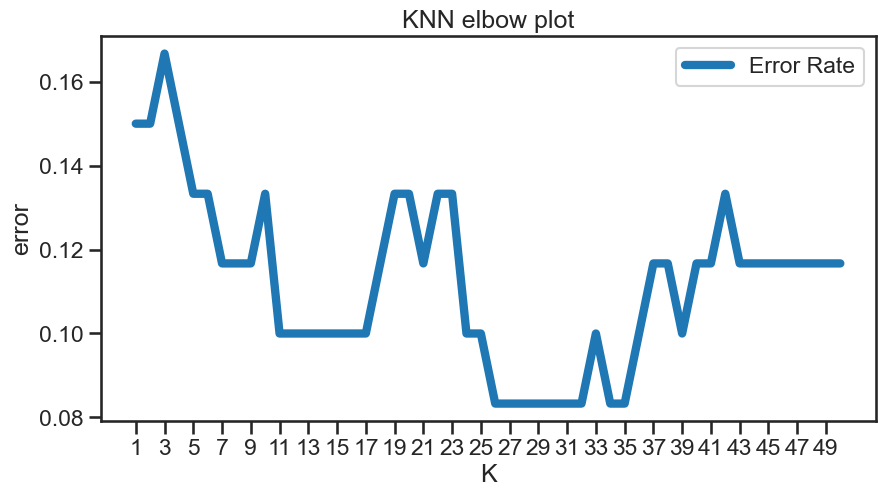

In [152]:
sns.set_context('talk')
sns.set_style('ticks')
plt.figure(dpi=300)
ax=error_rates.set_index('K').plot(figsize=(10,5),linewidth=6)
ax.set(xlabel='K',ylabel='error')
ax.set_title('KNN elbow plot')
ax.set_xticks(range(1,max_k+1,2)) # we can see that when k=25 to 31 the error is low


In [153]:
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [154]:
param_grid={'max_depth':range(1,DT.tree_.max_depth,2),'max_features':range(1,len(DT.feature_importances_),2)}
gr_dt=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid=param_grid,scoring='accuracy',n_jobs=-1)

In [155]:
gr_dt.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 4, 2),
                         'max_features': range(1, 5, 2)},
             scoring='accuracy')

In [156]:
gr_dt.best_params_ 

{'max_depth': 3, 'max_features': 1}

In [157]:
gr_dt.best_score_

np.float64(0.6428571428571429)

In [158]:
y_pred_gr_dt=gr_dt.predict(X_test)
print(classification_report(Y_test,y_pred_gr_dt))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      0.40      0.57         5
           2       0.42      1.00      0.59         5
           3       0.90      0.56      0.69        16
           4       0.72      0.96      0.83        27

    accuracy                           0.70        60
   macro avg       0.61      0.59      0.54        60
weighted avg       0.68      0.70      0.65        60



E:\sasya\sem4 holidays\ML\Supervised Regression\venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\sasya\sem4 holidays\ML\Supervised Regression\venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\sasya\sem4 holidays\ML\Supervised Regression\venv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [159]:
print('Decision Tree :')
get_accuracy(X_train,Y_train,X_test,Y_test,gr_dt)

Decision Tree :


{'train_accuracy': 0.7, 'test_accuracy': 0.7}

In [160]:
RF=RandomForestClassifier(random_state=42)

In [161]:
param_grid={'n_estimators':[2*(n+1) for n in range(20)],'max_depth':[2*(i+1) for i in range(10)],'max_features':['sqrt','log2']}

In [162]:
gr_rf=GridSearchCV(estimator=RF,param_grid=param_grid,scoring='accuracy')
gr_rf.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
                                          22, 24, 26, 28, 30, 32, 34, 36, 38,
                                          40]},
             scoring='accuracy')

In [163]:
gr_rf.best_score_

np.float64(1.0)

In [164]:
gr_rf.best_params_

{'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 38}

In [165]:
print('Random Forest:')
get_accuracy(X_train,Y_train,X_test,Y_test,gr_rf)

Random Forest:


{'train_accuracy': 1.0, 'test_accuracy': 0.9833333333333333}

In [174]:
y_pred_gr_rf=gr_rf.predict(X_test)
print(classification_report(Y_test,y_pred_gr_rf))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        27

    accuracy                           0.98        60
   macro avg       0.97      0.96      0.96        60
weighted avg       0.99      0.98      0.98        60



In [166]:
from sklearn.ensemble import StackingClassifier
estimators=[('SVM',SVC(random_state=42)),('KNN',KNeighborsClassifier()),('DT',DecisionTreeClassifier())]
stack_class=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

In [167]:
stack_class.fit(X_train,Y_train)

StackingClassifier(estimators=[('SVM', SVC(random_state=42)),
                               ('KNN', KNeighborsClassifier()),
                               ('DT', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

In [173]:
y_pred_stack=stack_class.predict(X_test)
print(classification_report(Y_test,y_pred_stack))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        16
           4       1.00      0.96      0.98        27

    accuracy                           0.97        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.97      0.97      0.97        60



In [169]:
print('stacking clasifier:')
get_accuracy(X_train,Y_train,X_test,Y_test,stack_class)

stacking clasifier:


{'train_accuracy': 1.0, 'test_accuracy': 0.9666666666666667}

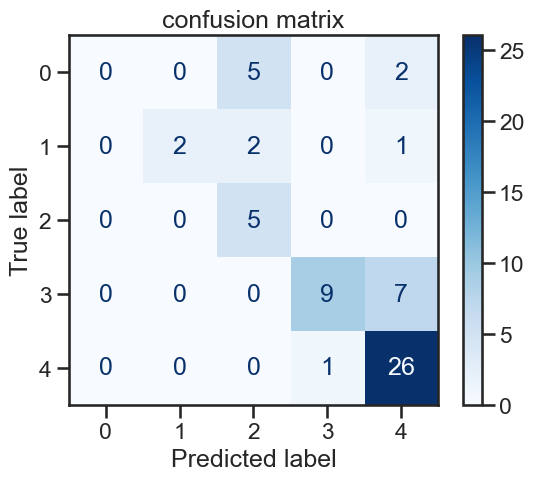

In [170]:
plot_confusion_matrix(Y_test,y_pred_gr_dt)

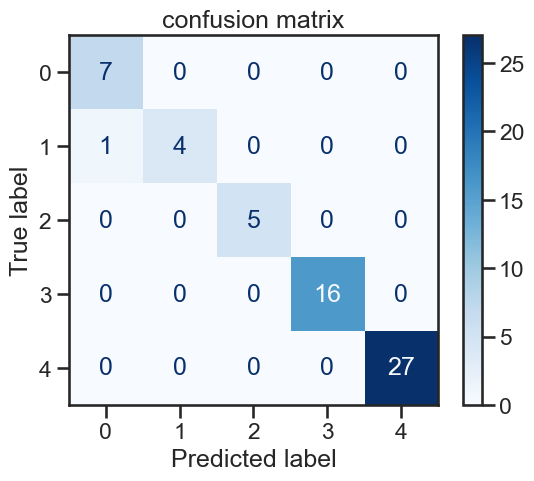

In [175]:
plot_confusion_matrix(Y_test,y_pred_gr_rf)

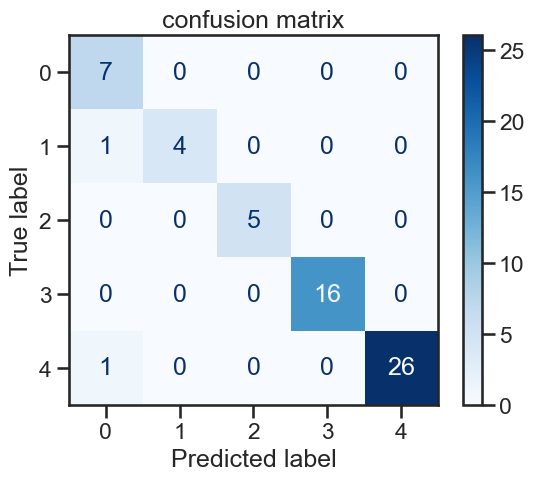

In [172]:
plot_confusion_matrix(Y_test,y_pred_stack)